In [1]:
#USING ADABOOST MODEL 
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# load data from excel file
data = pd.read_csv(r'C:\\Users\\Dell\\Downloads\\finalsheet.csv')
print(data)


     Participant  Task      Mean Time difference     State Task Type  \
0              1     1  5.788907         00:00:20  Driving     Voice   
1              1     2  7.434986         00:00:06  Driving     Touch   
2              1     3  6.813145         00:00:48  Driving     Touch   
3              1     4  6.144838         00:00:16  Driving     Voice   
4              1     5  5.080044         00:00:06  Driving     Touch   
..           ...   ...       ...              ...      ...       ...   
307           13    20  3.318020         00:00:08  Driving    Hybrid   
308           13    21  2.899259         00:00:10  Driving     Voice   
309           13    22  3.071401         00:00:08  Driving     Voice   
310           13    23  3.104857         00:00:16  Driving    Hybrid   
311           13    24  3.238166         00:00:16  Driving     Touch   

       Task Category        Task Nature  Baseline Mean   Normalised GSR  \
0      Radio Voice 1                 FM       13.394664     

In [3]:
# split data into input and output variables
X = data[['Normalised GSR']]
y = data['Anxiety Score']


In [4]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)



In [5]:
# Train the AdaBoost model
base_estimator = DecisionTreeClassifier(max_depth=1)
n_estimators = 50
learning_rate = 1.0
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate)
model.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [6]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion matrix:\n", confusion)

Accuracy: 0.7301587301587301
Confusion matrix:
 [[36  2]
 [15 10]]


In [7]:
from sklearn.metrics import precision_score, recall_score, fbeta_score

In [8]:
# Calculate precision
precision = precision_score(y_test, y_pred)
# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate F-beta score
beta = 1.0  # Set the value of beta
fbeta = fbeta_score(y_test, y_pred, beta=beta)


In [9]:
print("precision:",precision)
print("recall:",recall)
print(f"F{beta}-score:", fbeta)

precision: 0.8333333333333334
recall: 0.4
F1.0-score: 0.5405405405405406


In [10]:
import matplotlib.pyplot as plt


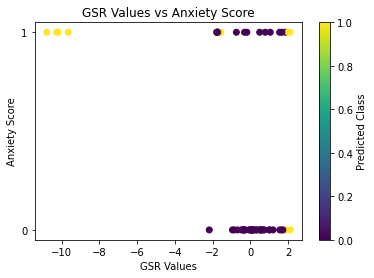

In [11]:
# Plot GSR values vs Anxiety scores
plt.scatter(X_test, y_test, c=y_pred, cmap='viridis')
plt.xlabel("GSR Values")
plt.ylabel("Anxiety Score")
plt.title("GSR Values vs Anxiety Score")
plt.colorbar(label="Predicted Class")
plt.yticks([0,1])

plt.show()

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
#USING RANDOMFOREST CLASSIFIER 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [14]:
# Define Random Forest parameters
params = {
    'n_estimators': 100,
    'max_depth': 5,
    'random_state': 60
}

In [15]:
# Train the Random Forest model
model = RandomForestClassifier(**params)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=60)

In [16]:
# Evaluate the model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion matrix:\n", confusion)


Accuracy: 0.7301587301587301
Confusion matrix:
 [[36  2]
 [15 10]]


In [17]:
# Calculate precision
precision = precision_score(y_test, y_pred)
# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate F-beta score
beta = 1.0  # Set the value of beta
fbeta = fbeta_score(y_test, y_pred, beta=beta)

In [18]:
print("precision:",precision)
print("recall:",recall)
print(f"F{beta}-score:", fbeta)

precision: 0.8333333333333334
recall: 0.4
F1.0-score: 0.5405405405405406


In [19]:
# USING LAZY CLASSIFIER 
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split


In [20]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# print model performance metrics
print(models)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.34it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
KNeighborsClassifier               0.84               0.81     0.81      0.84   
LabelPropagation                   0.81               0.77     0.77      0.80   
LabelSpreading                     0.79               0.75     0.75      0.78   
NearestCentroid                    0.79               0.75     0.75      0.78   
LGBMClassifier                     0.78               0.74     0.74      0.77   
SVC                                0.78               0.73     0.73      0.76   
QuadraticDiscriminantAnalysis      0.78               0.73     0.73      0.76   
GaussianNB                         0.78               0.73     0.73      0.76   
BernoulliNB                        0.75               0.71     0.71      0.74   
AdaBoostClassifier                 0.73               0.67     0.67      0.70   
XGBClassifier               

In [21]:
#USING KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [22]:
scaler = StandardScaler()

In [23]:
# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict the anxiety scores for the test set
y_pred = knn.predict(X_test)

In [24]:
# Evaluate the model
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8412698412698413


In [25]:
# Calculate precision
precision = precision_score(y_test, y_pred)
# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate F-beta score
beta = 1.0  # Set the value of beta
fbeta = fbeta_score(y_test, y_pred, beta=beta)

In [26]:
print("precision:",precision)
print("recall:",recall)
print(f"F{beta}-score:", fbeta)

precision: 0.8947368421052632
recall: 0.68
F1.0-score: 0.7727272727272727


In [27]:
# Sample data (replace with your actual data)
accuracy_scores = [0.73, 0.73, 0.84,0.79]  # Accuracy scores of the models

# Bar graph
models = ['AdaBoost', 'Random Forest', 'KNN Classifier','LGBM']


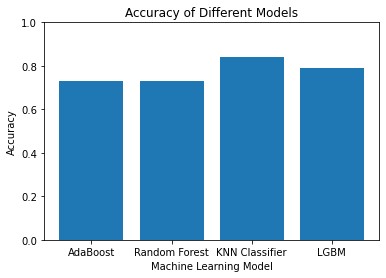

In [28]:
plt.bar(models, accuracy_scores)
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim([0, 1])  # Set the y-axis limits to range from 0 to 1
plt.show()

In [29]:
#USING LGBM CLASSIFIER
import lightgbm as lgb

In [30]:
# Create and train the LGBM Classifier
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)

LGBMClassifier()

In [31]:
# Predict the anxiety scores for the test set
y_pred = lgbm_model.predict(X_test)

In [32]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate precision
precision = precision_score(y_test, y_pred)
# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate F-beta score
beta = 1.0  # Set the value of beta
fbeta = fbeta_score(y_test, y_pred, beta=beta)
print("precision:",precision)
print("recall:",recall)
print(f"F{beta}-score:", fbeta)

Accuracy: 0.7936507936507936
precision: 0.8333333333333334
recall: 0.6
F1.0-score: 0.6976744186046512


In [33]:
pip install shap


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numba in c:\users\dell\anaconda3\lib\site-packages (from shap) (0.55.1)



In [34]:
import shap

In [35]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

In [36]:
# Evaluate SHAP values
shap_values 

.values =
array([[ 0.80952381],
       [-0.19047619],
       [-0.19047619],
       [ 0.80952381],
       [-0.19047619],
       [ 0.80952381],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [ 0.80952381],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [ 0.80952381],
       [ 0.80952381],
       [-0.19047619],
       [-0.19047619],
       [ 0.80952381],
       [-0.19047619],
       [ 0.80952381],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [ 0.80952381],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],
       [-0.19047619],


In [54]:
# Train a RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Initialize a SHAP explainer with the RandomForestClassifier model
explainer = shap.Explainer(rf_model)

# Calculate SHAP values for all instances
shap_values = explainer.shap_values(X)


In [55]:
# Calculating feature importances based on mean absolute SHAP values
feature_importances = np.abs(shap_values).mean(axis=0)

# Printing the feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Normalised GSR, Importance: [0.69032051]


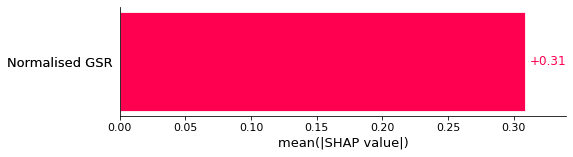

In [37]:
shap.plots.bar(shap_values)

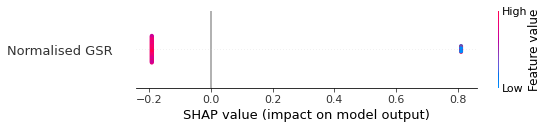

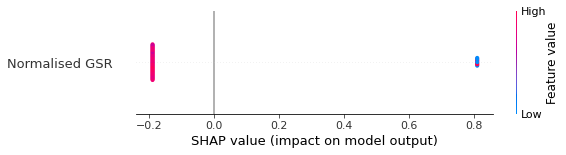

In [38]:
shap.summary_plot(shap_values)
# or 
shap.plots.beeswarm(shap_values)

In [39]:
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression


In [40]:
# Create and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict the probability scores for the test set
y_scores = logreg_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

In [41]:
# Print the AUC
print("AUC:", roc_auc)

AUC: 0.6547368421052632


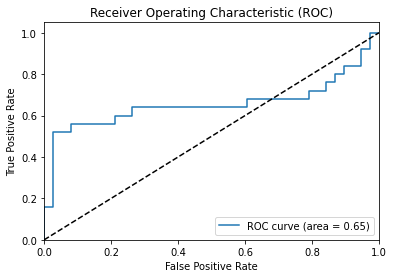

In [42]:
# Ploting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()